<a href="https://colab.research.google.com/github/rajdeepbanerjee-git/JNCLectures_Intro_to_ML/blob/main/Week5/Lec5_Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets

from scipy.stats import norm
from numpy import mean
from numpy import std

import matplotlib.pyplot as plt

In [2]:
iris = datasets.load_iris()
X = iris["data"][:, 3:]  # petal width
y = (iris["target"] == 2).astype(int)  # 1 if Iris virginica, else 0

In [3]:
def fit_distribution(data):
  """ fit prob distribution to a feature vector"""
  # estimate parameters
  mu = mean(data)
  sigma = std(data)
  # fit distribution
  dist = norm(mu, sigma)
  return dist

mean: 1.1993333333333336, standard dev: 0.7596926279021594


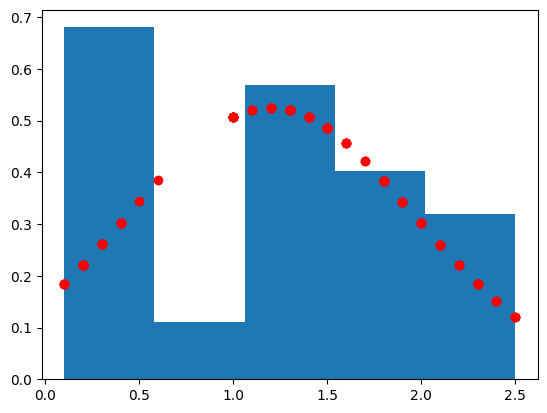

In [4]:
# let's see how the normal fit to X looks like
print(f"mean: {mean(X)}, standard dev: {std(X)}")
norm_dist_test = fit_distribution(X)
plt.hist(X, bins = 5, density = True) # note height of the barplot and hence normalization is dependent on the number of bins
plt.scatter(X, norm_dist_test.pdf(X), color = 'red')
plt.show()

In [5]:
# calculate prior given X and y

def calc_prior(X, y):

  Xy_0 = X[y==0]
  Xy_1 = X[y==1]

  prior_0 = len(Xy_0)/len(X)
  prior_1 = len(Xy_1)/len(X)

  return prior_0, prior_1

In [6]:
prior_0, prior_1 = calc_prior(X=X, y=y)
print(prior_0, prior_1)

0.6666666666666666 0.3333333333333333


In [7]:
# for each feature for each class fit distribution
# we have only one feature and two classes, Xy_0 and Xy_1
# let's calculate their distributions

Xy_0 = X[y==0]
Xy_1 = X[y==1]

dist_Xy0 = fit_distribution(Xy_0)
dist_Xy1 = fit_distribution(Xy_1)



In [8]:
# Now we will create a function which basically applies the Naive bayes rule
# to calculate the conditional prob P(y=k | X)
# note, if you have multiple features, you need to modify the function accordingly

def calc_NB_prob(X_sample, prior, distribution):
  return prior*distribution.pdf(X_sample)


In [9]:
# given X = X[0] = 0.2, calculate the probability of y = 0
print(calc_NB_prob(X_sample = X[0], prior =  prior_0, distribution = dist_Xy0))

# given X = X[0] = 0.2, calculate the probability of y = 1
print(calc_NB_prob(X_sample = X[0], prior =  prior_1, distribution = dist_Xy1))

[0.27479845]
[7.85531687e-11]


In [10]:
# let us run over the whole training data and calculate probability of 0 and 1 for each
results = []
for i, data in enumerate(X):

  pred_0 = calc_NB_prob(X_sample = X[i], prior =  prior_0, distribution = dist_Xy0)
  pred_1 = calc_NB_prob(X_sample = X[i], prior =  prior_1, distribution = dist_Xy1)

  if pred_0 > pred_1:
    y_pred = 0
  else:
    y_pred = 1

  results.append({
      "X": X[i],
      "y": y[i],
      "y_pred": y_pred,
      "pred_0": pred_0,
      "pred_1": pred_1
  })

results_df = pd.DataFrame(results)

In [17]:
accuracy = sum(results_df["y_pred"] == y)/len(y)
accuracy

0.96

#### Assignment: modify the code to include more than one feature and check the results.